**PROBLEM STATEMENT:**
         Predicting The Traffic Sign With German Traffic Sign Dataset


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [5]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [6]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:10<00:00, 67.2MB/s]
100% 612M/612M [00:10<00:00, 59.0MB/s]


In [7]:
!mkdir Dataset
!unzip -q gtsrb-german-traffic-sign.zip -d /content/Dataset

In [8]:
images = []
labels = []
classes = 43

for i in range(classes):
    path = '/content/Dataset/train/'+ str(i)
    raw_images = os.listdir(path)
    for img in raw_images:
        try:
            image = Image.open(path + '/'+ img)
            image = image.resize((50,50))
            image = np.array(image)
            images.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

#converting to numpy array
images = np.array(images)
labels = np.array(labels)

In [9]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [10]:
print('Shape of Image Data: ' + str(images.shape))
print('Shape of Label Data: ' + str(labels.shape))

Shape of Image Data: (39209, 50, 50, 3)
Shape of Label Data: (39209,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42, shuffle=True)

print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)


X_train.shape (29406, 50, 50, 3)
X_valid.shape (9803, 50, 50, 3)
y_train.shape (29406,)
y_valid.shape (9803,)


In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [13]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(8,8), activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(filters=32, kernel_size=(8,8), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))


model.add(Dense(43, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 43, 43, 16)          │           3,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 36, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 18, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,582,427 (9.85 MB)

 Trainable params: 2,582,107 (9.85 MB)

 Non-trainable params: 320 (1.25 KB)

In [14]:
from tensorflow.keras.optimizers import Adam
opt= Adam(learning_rate=0.001)

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
epochs = 20
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test))

Epoch 1/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.7136 - loss: 1.2161 - val_accuracy: 0.9455 - val_loss: 0.2182
Epoch 2/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.9593 - loss: 0.1372 - val_accuracy: 0.9821 - val_loss: 0.0594
Epoch 3/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9730 - loss: 0.0936 - val_accuracy: 0.9807 - val_loss: 0.0814
Epoch 4/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9774 - loss: 0.0772 - val_accuracy: 0.9793 - val_loss: 0.0909
Epoch 5/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9808 - loss: 0.0720 - val_accuracy: 0.9893 - val_loss: 0.0580
Epoch 6/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9849 - loss: 0.0567 - val_accuracy: 0.9838 - val_loss: 0.0581
Epoch 7/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9866 - loss: 0.0477 - val_accuracy: 0.9858 - val_loss: 0.0714
Epoch 8/20
919/919 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9852 - loss: 0.0607 - val_accuracy

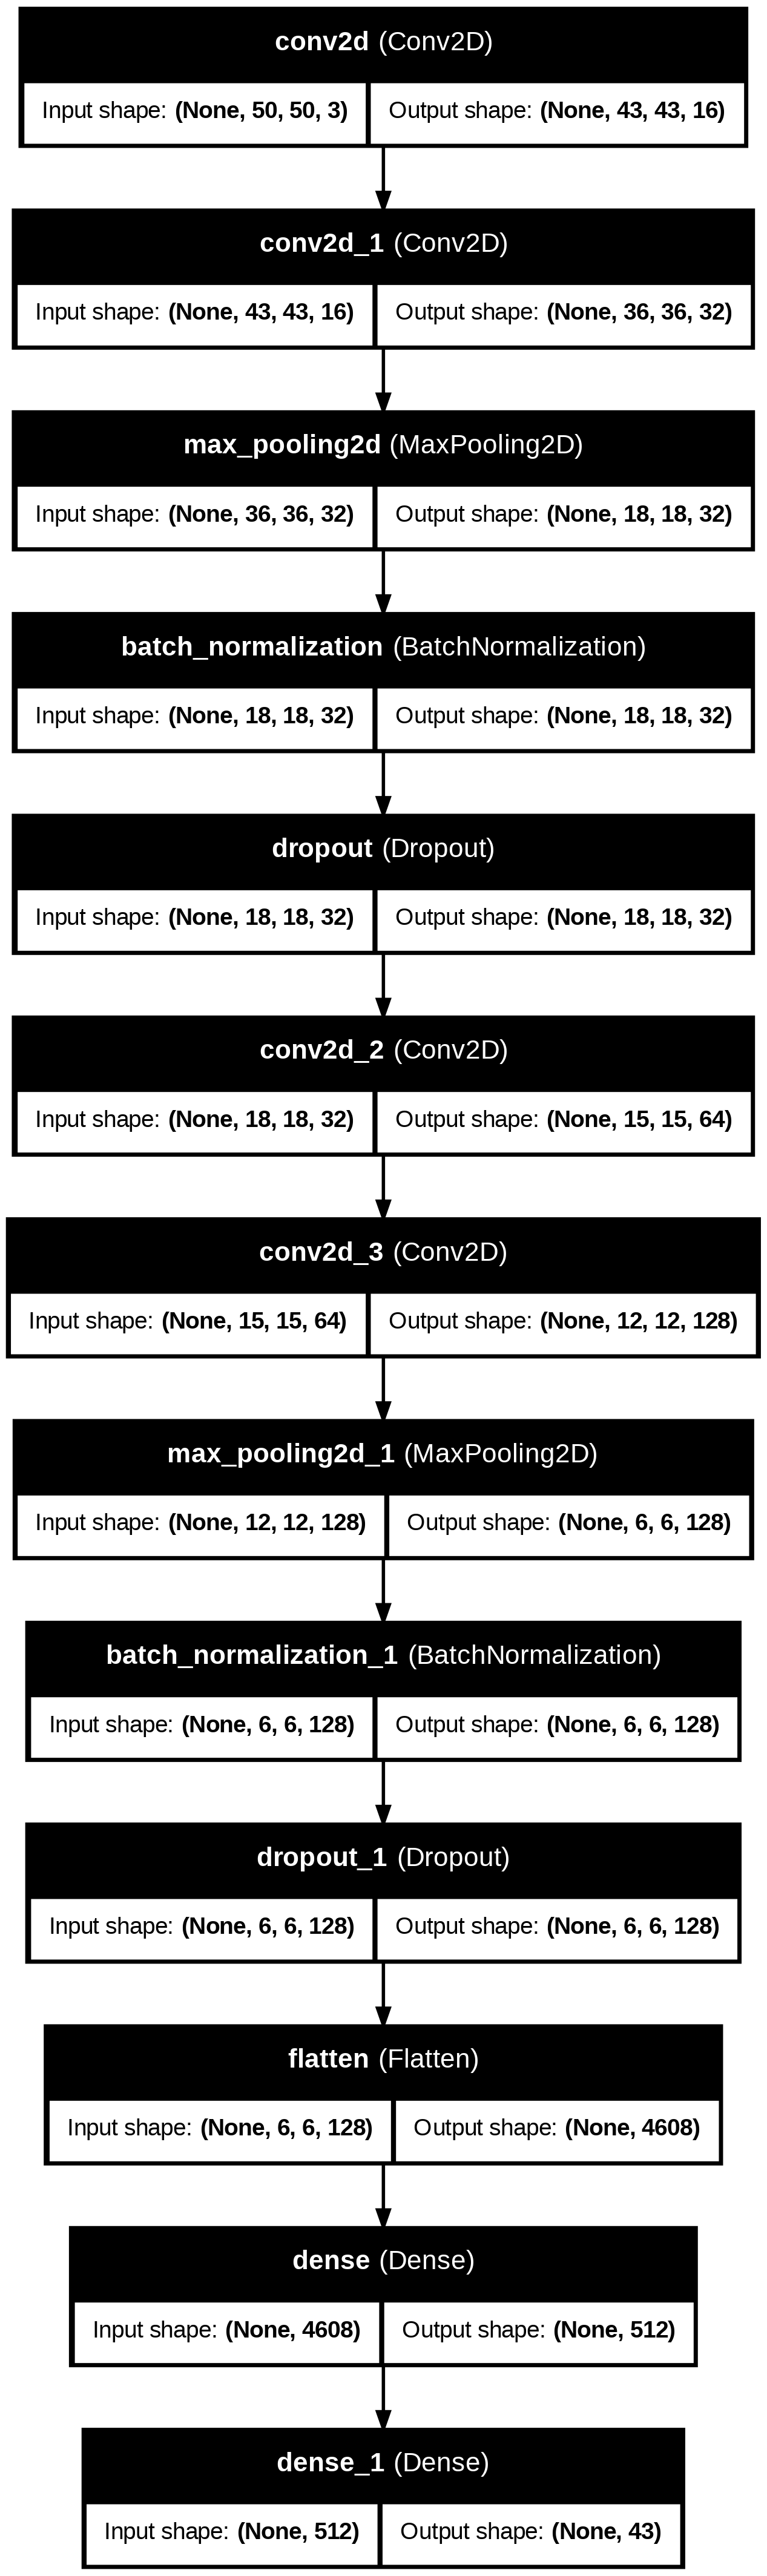

In [17]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

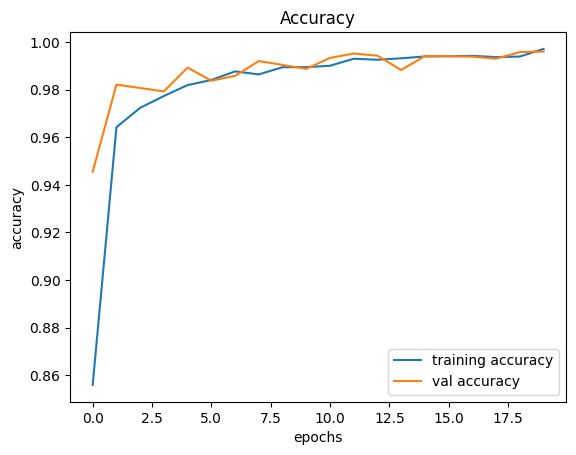

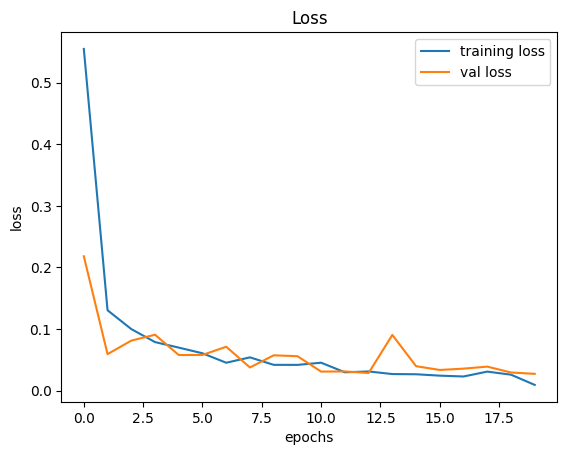

In [18]:
#Accuracy and Loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Testing

In [19]:
y_test = pd.read_csv('/content/Dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/Dataset/'+img)
        image = image.resize([50, 50])
        data.append(np.array(image))

X_test = np.array(data)

In [20]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(labels, pred)*100) + ' %')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy: 96.38163103721298 %


#Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm = np.loadtxt("confusion_matrix.csv", delimiter=",")

      0      1      2      3      4      5      6      7      8      9   ...  \
0   57.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    3.0    0.0  ...   
1    0.0  714.0    0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0  ...   
2    0.0    3.0  731.0   14.0    0.0    2.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0  442.0    0.0    5.0    0.0    1.0    0.0    0.0  ...   
4    1.0    3.0    0.0    0.0  644.0    8.0    0.0    0.0    1.0    0.0  ...   
5    0.0    9.0   21.0    1.0    1.0  598.0    0.0    0.0    0.0    0.0  ...   
6    0.0   16.0    0.0    0.0    0.0    6.0  121.0    0.0    0.0    0.0  ...   
7    0.0    0.0    0.0    0.0    0.0    0.0    0.0  443.0    5.0    0.0  ...   
8    2.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  447.0    0.0  ...   
9    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  480.0  ...   
10   0.0    0.0    0.0    0.0    0.0    4.0    0.0    0.0    2.0    0.0  ...   
11   0.0    0.0    0.0    0.0    0.0    

<Axes: >

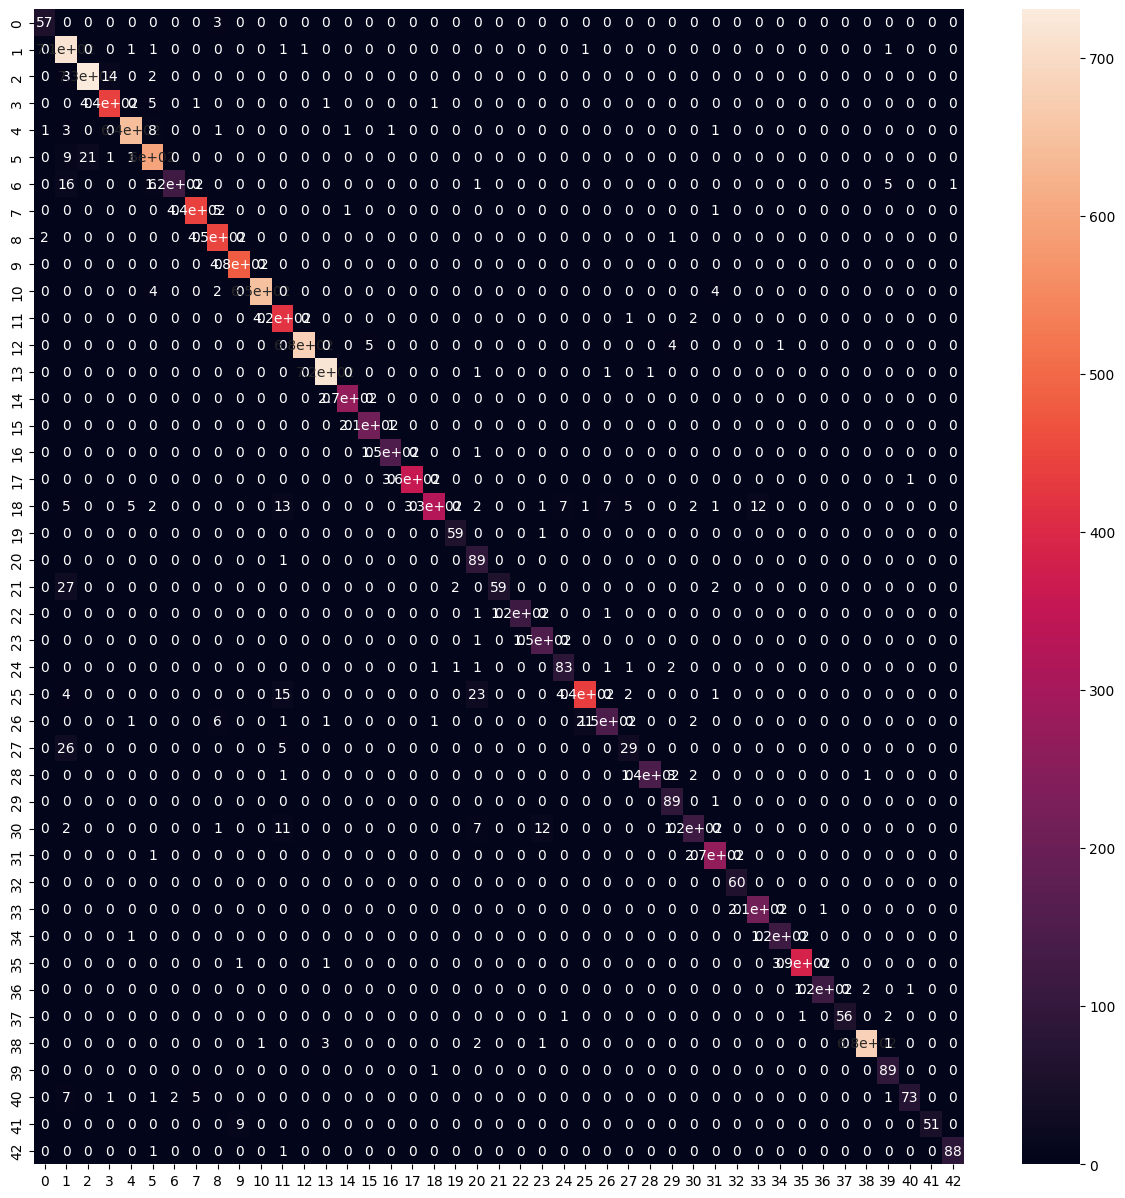

In [22]:
import seaborn as sns
df= pd.DataFrame(cm, index = classes,  columns = classes)
print(df)
plt.figure(figsize = (15,15))
sns.heatmap(df, annot=True)

In [23]:
model.save("./trained/Dlpproj.h5")

In [24]:
from keras.models import load_model
model = load_model('./trained/Dlpproj.h5')

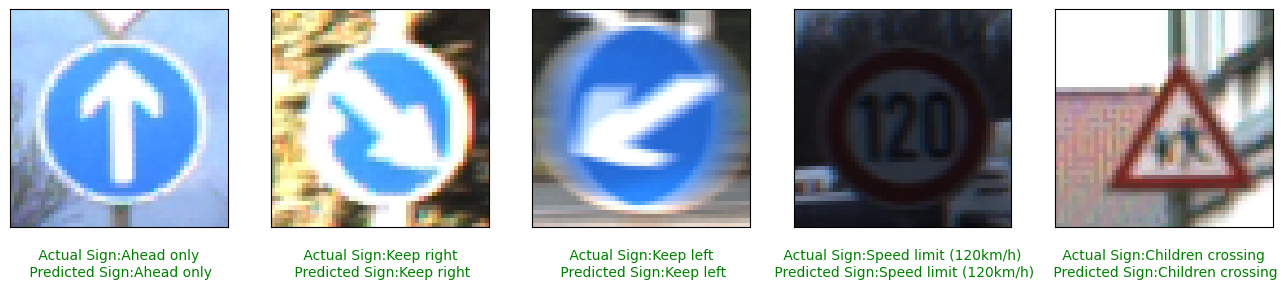

In [25]:
import random
plt.figure(figsize = (50, 50))

start_index = random.randint(0, 12360)
for i in range(5):
    start_index = random.randint(0, 12360)

    plt.subplot(10,15, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('\n Actual Sign:{} \n Predicted Sign:{}'.format(classes[actual],classes[prediction]), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

#INPUT IMAGE TO CLASSIFY


In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def classify_image():
    uploaded = files.upload()
    data = []
    for filename in uploaded.keys():
        image = Image.open(filename)

        image=rgb_image = image.convert("RGB")
        image = image.resize((50,50))

        data.append(np.array(image))

    x_test = np.array(data)
    y_pred = np.argmax(model.predict(x_test), axis=-1)

    return image, y_pred

pic, res = classify_image()
pic = ImageOps.scale(pic, 4)
pic.show()
print(res)
print("Sign={}".format(classes[res.item()]))

